비서울권 관광 인프라와 방문자 수의 상관 관계 분석
=====================================================
> Hyphothesis : 외부 방문자 수가 많은 지역은 관광 인프라도 많이 조성되어 있다.
>  - 외부 방문자 수와 관광 인프라의 상관 계수가 높을 것으로 예상

----------------------------------------------
> 서울 지역은 왜 제외되었나요?
> * 서울 지역은 인구 밀도가 매우 높고 모든 인프라가 발달되어 있기에 결과에 왜곡이 발생할 것 같아서 제외

## 데이터 출처 및 참고 자료

- [한국관광데이터랩(외부관광객수)](https://datalab.visitkorea.or.kr/datalab/portal/bda/getLocgoAna.do)

- [TourAPI3.0 사이트(관광인프라수집)](https://api.visitkorea.or.kr/search/galleryList.do)

- [카카오맵 API 개발 가이드](https://developers.kakao.com/docs/latest/ko/local/dev-guide) : 관광 인프라의 "주소" 데이터가 부정확하여 "위경도" 데이터를 카카오맵 API를 사용하여 주소 데이터로 전처리

In [1]:
# !sudo apt-get install -y fonts-nanum # Colab 한글 폰트 사용 
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)

!matplotlib inline

/bin/bash: matplotlib: command not found


# 1 데이터 로드하기
- [Github URL](https://github.com/Dongguk-DataScience/Data_Science)에서 받아오기

In [4]:
df_city = pd.read_csv("https://raw.githubusercontent.com/Dongguk-DataScience/Data_Science/main/dataset/city_spot.csv")

In [5]:
df_visitor = pd.read_csv("https://raw.githubusercontent.com/Dongguk-DataScience/Data_Science/main/dataset/visitor_outside_city.csv", encoding="cp949")

In [6]:
df_city.dtypes

관광유형     object
명칭       object
우편번호     object
주소       object
도시       object
시군구      object
위도      float64
경도      float64
dtype: object

In [7]:
df_visitor.dtypes

구역      object
지역      object
구분      object
2018     int64
2019     int64
dtype: object

# 2 결측치 확인

In [8]:
city_null_count = df_city.isnull().sum()
visitor_null_count = df_visitor.isnull().sum()

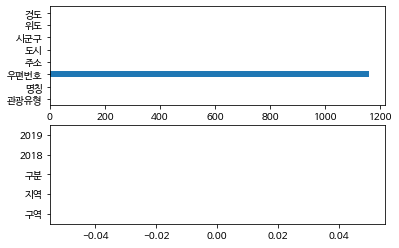

In [9]:
plt.subplot(2,1,1)
city_null_count.plot.barh()

plt.subplot(2,1,2)
visitor_null_count.plot.barh()

plt.show()

# 3 결측치 제거하기

- df_city의 결측치는 "우편번호"에만 있기에 column을 drop
- df_visitor의 결측치는 전처리 과정 중에 제거됨

- 추가적으로 "주소"의 값은 필요없기 때문에 제거

In [10]:
df_city.head()
# 도시 column은 "시군구" 행정 구역으로 정제되어있지 않음
# -> 위경도 데이터를 카카오맵 API에 이용하여 "시군구" 행정 구역으로 추출함

,관광유형,명칭,우편번호,주소,도시,시군구,위도,경도
0,관광지,쉰움산,25746,강원도 동해시 삼화로 584\n\t\t\t,강원도 동해시,강원도 동해시,37.455194,129.001569
1,관광지,대진 등대,24703,강원도 고성군 현내면 한나루로4길 16-38\n\t\t\t,강원도 고성군,강원도 고성군,38.503780,128.428794
2,관광지,감자꽃 스튜디오,25370,강원도 평창군 평창읍 고길천로 105\n\t\t\t,강원도 평창군,강원도 평창군,37.368851,128.438881
3,관광지,하평해변(강릉),25435,강원도 강릉시 사천면 진리해변길 155\n\t\t\t,강원도 강릉시,강원도 강릉시,37.844282,128.871922
4,관광지,기미만세공원,25162,강원도 홍천군 내촌면 물걸리\n\t\t\t,강원도 홍천군,강원도 홍천군,37.784525,128.146392


In [11]:
df_city = df_city.drop(["우편번호","주소"],axis=1)

In [12]:
df_city

,관광유형,명칭,도시,시군구,위도,경도
0,관광지,쉰움산,강원도 동해시,강원도 동해시,37.455194,129.001569
1,관광지,대진 등대,강원도 고성군,강원도 고성군,38.503780,128.428794
2,관광지,감자꽃 스튜디오,강원도 평창군,강원도 평창군,37.368851,128.438881
3,관광지,하평해변(강릉),강원도 강릉시,강원도 강릉시,37.844282,128.871922
4,관광지,기미만세공원,강원도 홍천군,강원도 홍천군,37.784525,128.146392
...,...,...,...,...,...,...
22547,축제공연,청원생명축제,충청북도 청주시 청원구,충청북도 청주시,36.733250,127.407383
22548,축제공연,충주국제무예액션영화제 2020,충청북도 충주시,충청북도 충주시,36.987880,127.905592
22549,축제공연,박달 가요제 2020,충청북도 제천시,충청북도 제천시,37.136177,128.208483
22550,축제공연,괴산고추축제,충청북도 괴산군,충청북도 괴산군,36.815381,127.786697


# 4 방문자 수가 많은 지역, 적은 지역 검증하기

In [13]:
df_visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구역      205 non-null    object
 1   지역      205 non-null    object
 2   구분      205 non-null    object
 3   2018    205 non-null    int64 
 4   2019    205 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.1+ KB


In [14]:
df_visitor.sort_values(by="2019",ascending=False).head(20)

,구역,지역,구분,2018,2019
18,경기도,수원시,외부방문자(b+c),189573188,197291922
27,경기도,고양시,외부방문자(b+c),163441603,167244878
19,경기도,성남시,외부방문자(b+c),152276012,158671190
36,경기도,용인시,외부방문자(b+c),127353660,139320409
49,경상남도,창원시,외부방문자(b+c),133612220,134445734
194,충청북도,청주시,외부방문자(b+c),119148969,121062373
41,경기도,화성시,외부방문자(b+c),83573712,90317636
179,충청남도,천안시,외부방문자(b+c),83013683,84352715
26,경기도,안산시,외부방문자(b+c),80441729,83779181
21,경기도,안양시,외부방문자(b+c),79683702,80634292


In [15]:
df_visitor.sort_values(by="2019",ascending=True).head(20)

,구역,지역,구분,2018,2019
132,인천광역시,남구,외부방문자(b+c),35552310,0
80,경상북도,영양군,외부방문자(b+c),1589333,1658312
89,경상북도,울릉군,외부방문자(b+c),1554421,1751214
172,전라북도,장수군,외부방문자(b+c),2744075,2815193
14,강원도,양구군,외부방문자(b+c),2749003,3349779
57,경상남도,의령군,외부방문자(b+c),3737229,3890888
87,경상북도,봉화군,외부방문자(b+c),3957501,4149336
161,전라남도,진도군,외부방문자(b+c),3480447,4186618
174,전라북도,순창군,외부방문자(b+c),3952645,4204101
170,전라북도,진안군,외부방문자(b+c),4130004,4313931


# 5 TOP 15 지역의 관광 인프라 분석

In [16]:
def extract_infra(text):
  name = df_city[df_city["시군구"].str.contains(text)]["시군구"].iloc[0]
  special_city_df = df_city[df_city["시군구"] == name]
  special_infra = special_city_df["관광유형"].value_counts()
  return special_city_df, special_infra


## 5.1 Top 15 지역 인프라 추출

In [17]:
df_suwon, suwon_infra =extract_infra("수원")

In [18]:
df_goyang, goyang_infra =extract_infra("고양")

In [19]:
df_sungnam, sungnam_infra =extract_infra("성남")

In [20]:
df_yongin, yongin_infra =extract_infra("용인")

In [21]:
df_changwon, changwon_infra =extract_infra("창원")

In [22]:
df_chungju, chungju_infra =extract_infra("청주")

In [23]:
df_hwasung, hwasung_infra =extract_infra("화성")

In [24]:
df_chunan, chunan_infra =extract_infra("천안")

In [25]:
df_ansan, ansan_infra =extract_infra("안산")

In [26]:
df_anyang, anyang_infra =extract_infra("안양")

In [27]:
df_bucheon, bucheon_infra =extract_infra("부천")

In [28]:
df_junju, junju_infra =extract_infra("전주")

In [29]:
df_busan, busan_infra =extract_infra("부산")

In [30]:
df_incheon, incheon_infra =extract_infra("인천")

In [31]:
df_daegu, daegu_infra =extract_infra("대구")

## 5.2 종합 분석

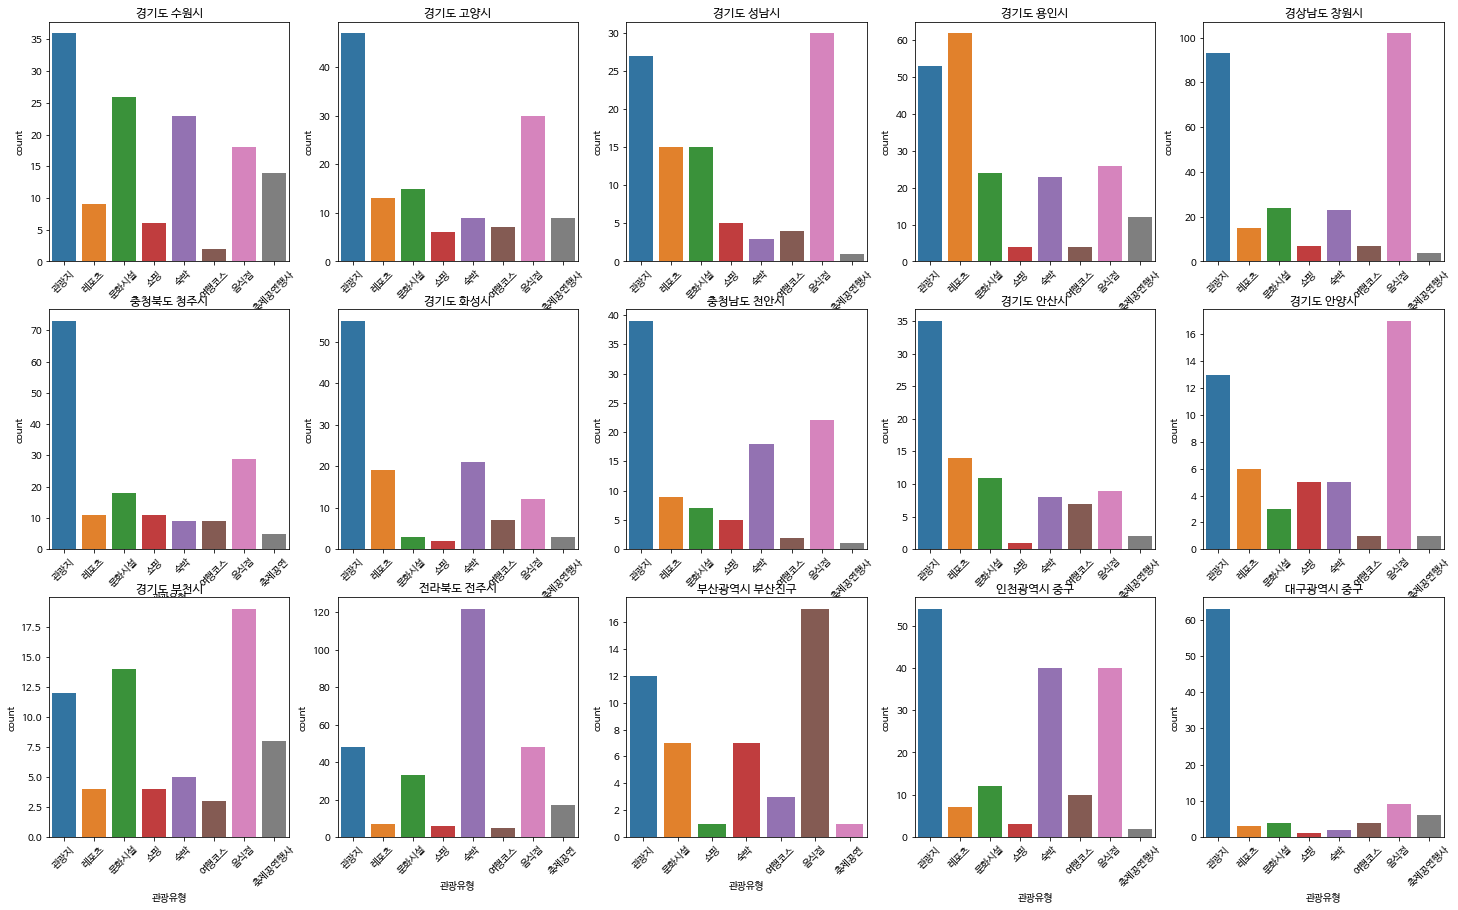

In [32]:
plt.figure(figsize=(25,15))

plt.subplot(3,5,1)
plt.title("경기도 수원시")
sns.countplot(data=df_suwon,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,2)
plt.title("경기도 고양시")
sns.countplot(data=df_goyang,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,3)
plt.title("경기도 성남시")
sns.countplot(data=df_sungnam,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,4)
plt.title("경기도 용인시")
sns.countplot(data=df_yongin,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,5)
plt.title("경상남도 창원시")
sns.countplot(data=df_changwon,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,6)
plt.title("충청북도 청주시")
sns.countplot(data=df_chungju,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,7)
plt.title("경기도 화성시")
sns.countplot(data=df_hwasung,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,8)
plt.title("충청남도 천안시")
sns.countplot(data=df_chunan,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,9)
plt.title("경기도 안산시")
sns.countplot(data=df_ansan,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,10)
plt.title("경기도 안양시")
sns.countplot(data=df_anyang,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,11)
plt.title("경기도 부천시")
sns.countplot(data=df_bucheon,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,12)
plt.title("전라북도 전주시")
sns.countplot(data=df_junju,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,13)
plt.title("부산광역시 부산진구")
sns.countplot(data=df_busan,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,14)
plt.title("인천광역시 중구")
sns.countplot(data=df_incheon,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,15)
plt.title("대구광역시 중구")
sns.countplot(data=df_daegu,x="관광유형")
plt.xticks(rotation='45')


plt.show()

# 6 TAIL 15 지역의 관광 인프라 분석

## 6.1 Tail 15 지역 인프라 추출

In [33]:
df_yeongyang, yeongyang_infra =extract_infra("영양")

In [34]:
df_ulleung, ulleung_infra =extract_infra("울릉")

In [35]:
df_jangsu, jansu_infra =extract_infra("장수")

In [36]:
df_yanggu, yanggu_infra =extract_infra("양구")

In [37]:
df_uilyeong, uilyeong_infra =extract_infra("의령")

In [38]:
df_bonghwa, bonghwa_infra =extract_infra("봉화")

In [39]:
df_jindo, jindo_infra =extract_infra("진도")

In [40]:
df_sunchang, sunchang_infra =extract_infra("순창")

In [41]:
df_jinan, jinan_infra =extract_infra("진안")

In [42]:
df_chungyang, chungyang_infra =extract_infra("청양")

In [43]:
df_jangheung, jangheung_infra =extract_infra("장흥")

In [44]:
df_gyeryong, gyeryong_infra =extract_infra("계룡")

In [45]:
df_chungsong, chungsong_infra =extract_infra("청송")

In [46]:
df_hwacheon, hwacheon_infra =extract_infra("화천")

In [47]:
df_gogsung, gogsung_infra =extract_infra("곡성")

## 6.2 종합 분석

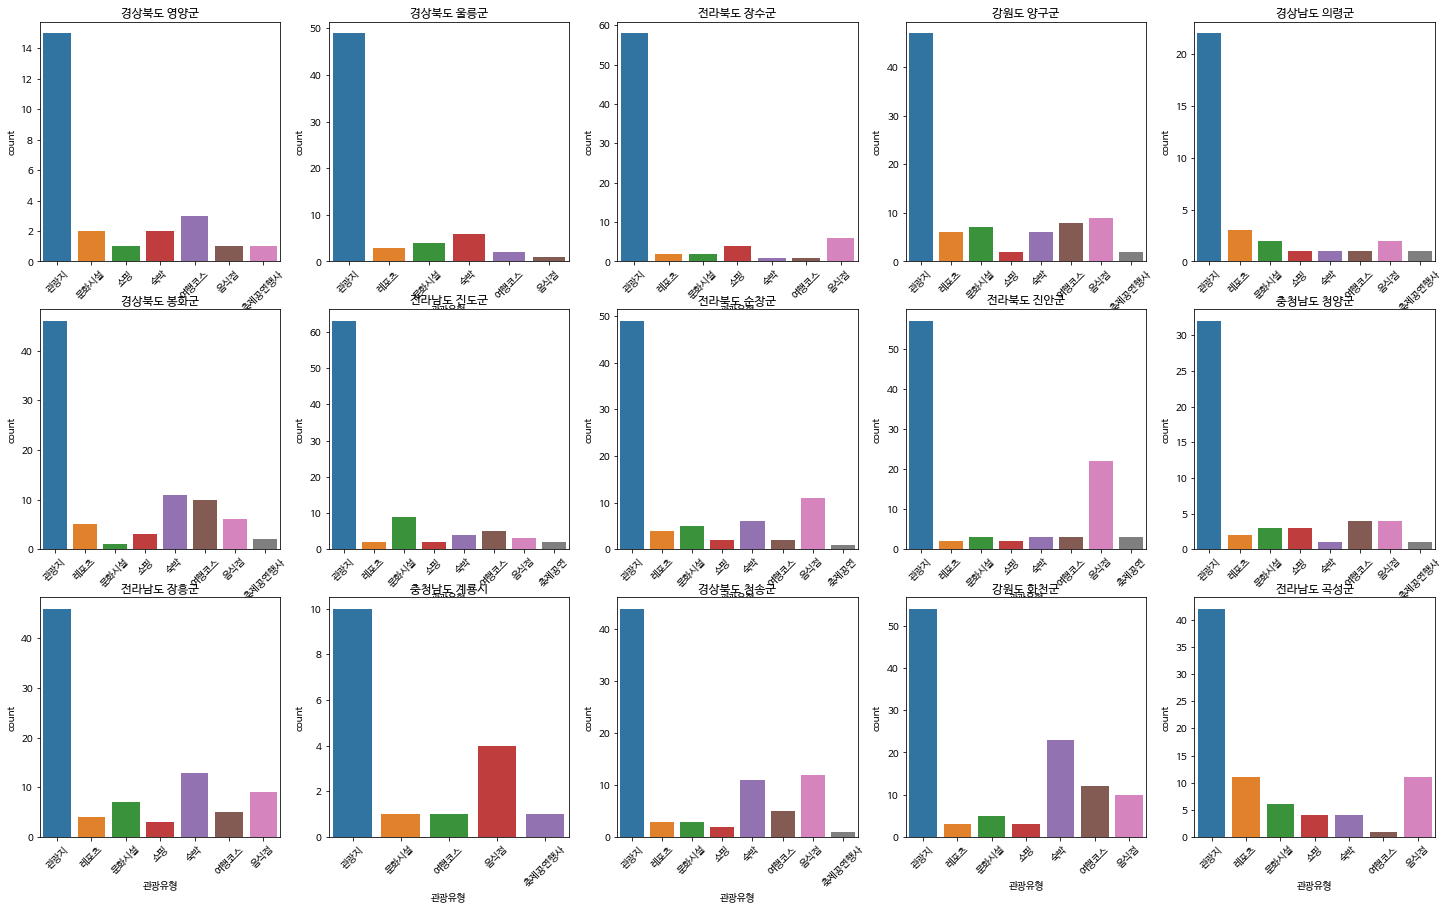

In [48]:
plt.figure(figsize=(25,15))

plt.subplot(3,5,1)
plt.title("경상북도 영양군")
sns.countplot(data=df_yeongyang,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,2)
plt.title("경상북도 울릉군")
sns.countplot(data=df_ulleung,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,3)
plt.title("전라북도 장수군")
sns.countplot(data=df_jangsu,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,4)
plt.title("강원도 양구군")
sns.countplot(data=df_yanggu,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,5)
plt.title("경상남도 의령군")
sns.countplot(data=df_uilyeong,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,6)
plt.title("경상북도 봉화군")
sns.countplot(data=df_bonghwa,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,7)
plt.title("전라남도 진도군")
sns.countplot(data=df_jindo,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,8)
plt.title("전라북도 순창군")
sns.countplot(data=df_sunchang,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,9)
plt.title("전라북도 진안군")
sns.countplot(data=df_jinan,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,10)
plt.title("충청남도 청양군")
sns.countplot(data=df_chungyang,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,11)
plt.title("전라남도 장흥군")
sns.countplot(data=df_jangheung,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,12)
plt.title("충청남도 계룡시")
sns.countplot(data=df_gyeryong,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,13)
plt.title("경상북도 청송군")
sns.countplot(data=df_chungsong,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,14)
plt.title("강원도 화천군")
sns.countplot(data=df_hwacheon,x="관광유형")
plt.xticks(rotation='45')

plt.subplot(3,5,15)
plt.title("전라남도 곡성군")
sns.countplot(data=df_gogsung,x="관광유형")
plt.xticks(rotation='45')


plt.show()

# 7 Sample 검증하기
- 전체적으로 관광지가 많게 나오기에 몇개의 샘플을 뽑아 검증

In [49]:
def extract_sample():
  name = df_city.sample()["시군구"]
  name=name.to_list()
  name = " ".join(name)
  special_city_df = df_city[df_city["시군구"] == name]
  special_infra = special_city_df["관광유형"].value_counts()
  return special_city_df, special_infra

In [50]:
sample_df, sample_infra = extract_sample()

In [51]:
sample_df

,관광유형,명칭,도시,시군구,위도,경도
8775,관광지,덕수공원,경상북도 포항시 북구,경상북도 포항시,36.043962,129.360446
8786,관광지,호미곶 해맞이광장,경상북도 포항시 남구,경상북도 포항시,36.077840,129.568260
8795,관광지,보경사,경상북도 포항시 북구,경상북도 포항시,36.252121,129.318021
8819,관광지,하옥계곡,경상북도 포항시 북구,경상북도 포항시,36.312777,129.252548
8822,관광지,영일만온천,경상북도 포항시 남구,경상북도 포항시,35.952919,129.361457
...,...,...,...,...,...,...
11078,음식점,고향숯불갈비,경상북도 포항시 북구,경상북도 포항시,36.041790,129.369601
11123,음식점,과메기특구일호식당,경상북도 포항시 북구,경상북도 포항시,36.027883,129.355814
11132,음식점,마라도회식당,경상북도 포항시 북구,경상북도 포항시,36.064788,129.387199
11155,축제공연행사,포항스틸아트페스티벌 2020,경상북도 포항시 북구,경상북도 포항시,36.062355,129.381999


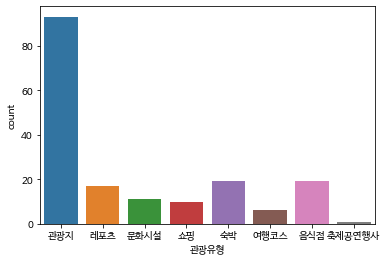

In [52]:
sns.countplot(data=sample_df,x="관광유형")

## Top 과 Tail 중간 분석
---------------------------------------
### 공통점
```
- 전체 관광 인프라에서 관광지와 음식점의 비중이 높다.
```

### 차이점
```
- 관광지, 음식점을 제외한 관광 인프라의 개수 차이가 명확하다
```

# 8 상관계수 구하기

In [53]:
df_count = pd.read_csv("https://raw.githubusercontent.com/Dongguk-DataScience/Data_Science/main/dataset/total_count.csv")

In [54]:
corr=df_count.corr()
corr

,관광지,음식점,문화시설,레포츠,숙박,축제공연행사,쇼핑,여행코스,방문자
관광지,1.000000,0.696348,0.699906,0.578890,0.602485,0.571836,0.690204,0.694912,0.021886
음식점,0.696348,1.000000,0.778079,0.367248,0.661870,0.648886,0.781580,0.535936,0.195134
문화시설,0.699906,0.778079,1.000000,0.399819,0.542667,0.841643,0.827946,0.596729,0.352031
레포츠,0.578890,0.367248,0.399819,1.000000,0.451257,0.408204,0.291585,0.447669,0.190397
숙박,0.602485,0.661870,0.542667,0.451257,1.000000,0.548058,0.517270,0.413377,0.132049
축제공연행사,0.571836,0.648886,0.841643,0.408204,0.548058,1.000000,0.716041,0.485358,0.369832
쇼핑,0.690204,0.781580,0.827946,0.291585,0.517270,0.716041,1.000000,0.568450,0.211147
여행코스,0.694912,0.535936,0.596729,0.447669,0.413377,0.485358,0.568450,1.000000,0.048506
방문자,0.021886,0.195134,0.352031,0.190397,0.132049,0.369832,0.211147,0.048506,1.000000


In [55]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [56]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

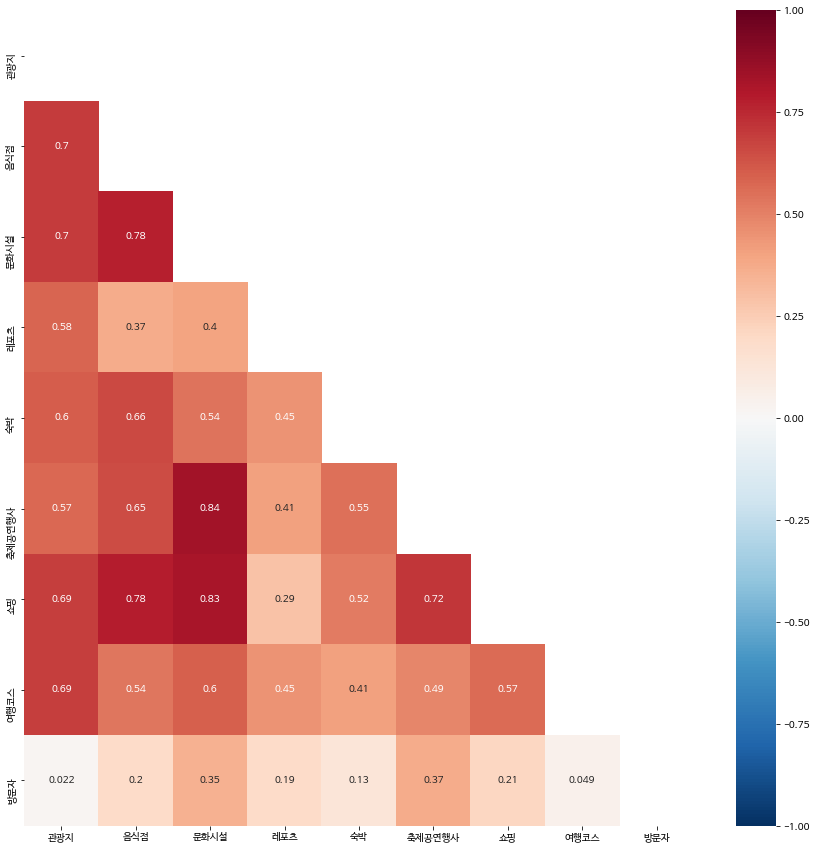

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap = "RdBu_r", vmax=1, vmin= -1, mask =mask)

Result
=======================
- 문화시설과 축제공연행사는 양적 선형관계가 관측되지만 다른 인프라와의 상관 관계는 관측되지 않았다.

> Hypothesis Test : 각 지역의 외부 방문자 수와 해당 지역 관광 인프라 수의 상관 관계가 명확하지 않다
> > 관광 인프라만으로는 결론 도출이 어렵기에 다른 부가적인 요소의 작용이 크다고 판단
> > > 방문자 수 증진 요소들에 대한 추가적인 분석이 필요

## 첨언
-------------------------------------
- 우수한 관광자원을 갖고있다 하더라도 관광정책이 구체적으로 시행되지 않으면 무익하다

- 관광지 활성화에 있어서 지역 관광 자원보다는 해당 지역의 관광 사업을 지원하는 정책적인 지원이 더 큰 영향을 미침

## 보충 자료
---------------------------------
- 추가적인 분석 및 전처리 과정을 참고하실 분들은 하위 링크를 참고해주시기 바랍니다.
- [GitHub URL](https://github.com/Dongguk-DataScience/Data_Science/blob/main/README.md)